In [1]:
import numpy as np
import matplotlib.pyplot as plt

# グリッドワールドのサイズ
grid_size = (5, 5)

gamma = 0.9  # 割引率
threshold = 1e-4  # 収束判定の閾値

# 報酬の設定
rewards = np.zeros(grid_size)
rewards[0, 1] = 10  # 特殊状態 A の報酬
rewards[0, 3] = 5   # 特殊状態 B の報酬
penalty = -1        # 境界を越える場合のペナルティ

# 状態遷移確率と行動
actions = ["north", "south", "east", "west"]

In [2]:
rewards

array([[ 0., 10.,  0.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [3]:
def move(state,action):
    x,y = state
    if action == "north":
        return (max(0,x-1),y)
    elif action == "south":
        return (min(x +1 ,grid_size[0]-1),y)
    elif action == "east":
        return (x,min(y+1,grid_size[1]-1))
    elif action == "west":
        return (x, max(0,y-1))
    return state

In [15]:
def compute_optimal_value_function():
    v = np.zeros(grid_size)
    delta = float("inf")
    while delta > threshold:
        delta = 0
        new_v = np.zeros_like(v)
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                state = (x, y)
                max_value = float("-inf")
                for action in actions:
                    next_state = move(state, action)
                    reward = rewards[next_state]
                    if next_state == state:  # 境界にぶつかった場合のペナルティ
                        reward += penalty
                    value = reward + gamma * v[next_state]
                    max_value = max(max_value, value)
                new_v[state] = max_value
                delta = max(delta, abs(v[state] - max_value))
        v = new_v
    return v

In [16]:
# 最適ポリシーを導出
def extract_optimal_policy(v):
    policy = np.full(grid_size, "", dtype=object)
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            state = (x, y)
            best_action = None
            max_value = float("-inf")
            for action in actions:
                next_state = move(state, action)
                reward = rewards[next_state]
                if next_state == state:  # 境界ペナルティ
                    reward += penalty
                value = reward + gamma * v[next_state]
                if value > max_value:
                    max_value = value
                    best_action = action
            policy[state] = best_action
    return policy

In [17]:
optimal_values = compute_optimal_value_function()
optimal_policy = extract_optimal_policy(optimal_values)

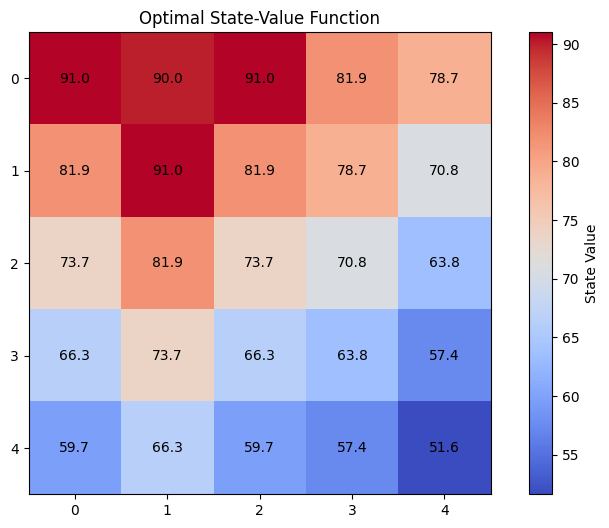

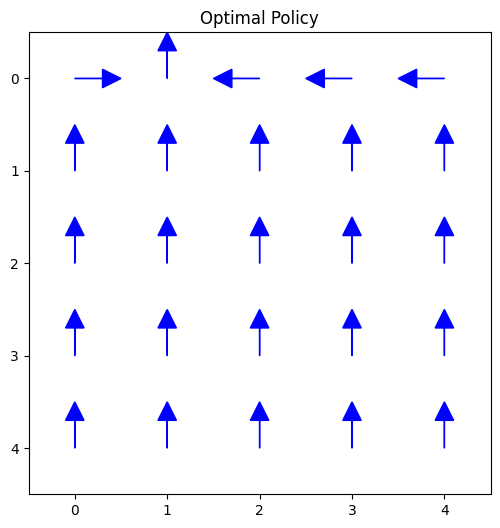

In [18]:
# 結果を可視化
plt.figure(figsize=(10, 6))
plt.title("Optimal State-Value Function")
plt.imshow(optimal_values, cmap="coolwarm", origin="upper")
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        plt.text(y, x, f"{optimal_values[x, y]:.1f}", ha="center", va="center", color="black")
plt.colorbar(label="State Value")
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Optimal Policy")
plt.imshow(np.zeros(grid_size), cmap="Greys", origin="upper")
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        action = optimal_policy[x, y]
        if action == "north":
            plt.arrow(y, x, 0, -0.3, head_width=0.2, head_length=0.2, fc="blue", ec="blue")
        elif action == "south":
            plt.arrow(y, x, 0, 0.3, head_width=0.2, head_length=0.2, fc="blue", ec="blue")
        elif action == "east":
            plt.arrow(y, x, 0.3, 0, head_width=0.2, head_length=0.2, fc="blue", ec="blue")
        elif action == "west":
            plt.arrow(y, x, -0.3, 0, head_width=0.2, head_length=0.2, fc="blue", ec="blue")
plt.show()